<a href="https://colab.research.google.com/github/gunjanak/My_Data_Science_Course/blob/main/Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
ecom_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_missing_multiple.csv')
co2_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_missing.csv')

In [ ]:
ecom_df.head()

,date,price,location,clicks
0,4/1/08,43.155647,2.0,18784
1,4/2/08,43.079056,1.0,24738
2,NaN,43.842609,NaN,15209
3,NaN,NaN,1.0,14018
4,NaN,43.941176,1.0,11974


In [ ]:
co2_df.head()

,year,co2
0,1750,0.0125
1,1760,0.0128
2,1770,0.0150
3,1780,0.0169
4,1790,0.0206


In [ ]:
co2_df.isna().sum()

year     0
co2     25
dtype: int64

In [ ]:
ecom_df.isna().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [ ]:
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [ ]:
#to get the grand total for the entire ecom_df
ecom_df.isnull().sum().sum()

20

In [ ]:
#If all we need is to check whether the DataFrame contains any missing values
#use isnull().values.any().
#This will output True if there are any missing values in data
ecom_df.isnull().values.any()

True

In [ ]:
co2_df.isnull().values.any()

True

In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    226 non-null    int64  
 1   co2     201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.7 KB


In [ ]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      131 non-null    object 
 1   price     134 non-null    float64
 2   location  134 non-null    float64
 3   clicks    121 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.3+ KB


In [ ]:
co2_df.describe(include='all',datetime_is_numeric=True)

,year,co2
count,226.000000,201.000000
mean,1906.902655,1.590015
std,66.543281,1.644182
min,1750.000000,0.000000
25%,1851.250000,0.076400
50%,1907.500000,0.935100
75%,1963.750000,2.807600
max,2020.000000,4.907900


In [ ]:
ecom_df.describe(include='all',datetime_is_numeric=True)

,date,price,location,clicks
count,131,134.000000,134.000000,121
unique,131,NaN,NaN,119
top,4/1/08,NaN,NaN,?
freq,1,NaN,NaN,2
mean,NaN,43.480221,1.694030,NaN
std,NaN,0.610578,1.118724,NaN
min,NaN,42.207018,1.000000,NaN
25%,NaN,43.038050,1.000000,NaN
50%,NaN,43.498842,1.000000,NaN
75%,NaN,43.889935,2.000000,NaN


In [ ]:
#Convert the 0 and ? values to NaN types
#This can be accomplished using the DataFrame.replacy() method
co2_df.replace(0,np.NaN,inplace=True)
ecom_df.replace('?',np.NaN,inplace=True)
ecom_df['clicks'] = ecom_df['clicks'].astype('float')

In [ ]:
#To validate run .isnull().sum() and one should notice that the missing value counts have increased
co2_df.isnull().sum()

year     0
co2     35
dtype: int64

In [ ]:
co2_df.describe(include='all',datetime_is_numeric=True)

,year,co2
count,226.000000,191.000000
mean,1906.902655,1.673262
std,66.543281,1.644867
min,1750.000000,0.012500
25%,1851.250000,0.106050
50%,1907.500000,1.185000
75%,1963.750000,2.924700
max,2020.000000,4.907900


In [ ]:
ecom_df.describe(include='all',datetime_is_numeric=True)

,date,price,location,clicks
count,131,134.000000,134.000000,119.000000
unique,131,NaN,NaN,NaN
top,4/1/08,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,43.480221,1.694030,9530.336134
std,NaN,0.610578,1.118724,4687.587507
min,NaN,42.207018,1.000000,2044.000000
25%,NaN,43.038050,1.000000,6438.000000
50%,NaN,43.498842,1.000000,8391.000000
75%,NaN,43.889935,2.000000,11363.500000


In [ ]:
#If you change keep_default_na to False without
#providing new values to na_values, then nonw of the strings
#(NA,N/A and null) would be parsed to NaN unless we provide a custom list
co2_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_missing.csv'
co2_df = pd.read_csv(co2_path,keep_default_na=False)

In [ ]:
co2_df.isna().sum()

year    0
co2     0
dtype: int64

In [ ]:
#We did not lose any data but showed no NaN or missing values
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    226 non-null    int64 
 1   co2     226 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
co2_df[190:195]

,year,co2
190,1985,NA
191,1986,N/A
192,1987,null
193,1988,4.2953
194,1989,4.2782


In [ ]:
co2_df.iloc[132:139] 

,year,co2
132,1927,
133,1928,
134,1929,
135,1930,
136,1931,
137,1932,
138,1933,


#Handling missing data with univariate imputation using pandas

We will start by importing the liabraries and then read all four CSV files. We will use the original versions of datasets to compare the results of the imputations to gain a better intution of how they perform.


For the comparision measure, we will use RMSE to evaluate each technique and then visualize the outputs to compare the imputation results visually.

In [11]:
co2_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_original.csv'
co2_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_missing.csv'
clicks_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_original.csv'
clicks_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_missing.csv'

In [12]:
co2_original = pd.read_csv(co2_original_path)
co2_missing = pd.read_csv(co2_missing_path)
clicks_original = pd.read_csv(clicks_original_path)
clicks_missing = pd.read_csv(clicks_missing_path)

In [13]:
clicks_missing.head()

,date,price,location,clicks
0,4/1/08,43.155647,2,18784.0
1,4/2/08,43.079056,1,24738.0
2,4/3/08,43.842609,2,15209.0
3,4/4/08,43.312376,1,14018.0
4,4/5/08,43.941176,1,11974.0


In [14]:
def plot_dfs(df1,df2,col,title = None,xlabel=None,ylabel=None):
  """
  df1: original dataframe without missing data
  df2: dataframe with missing data
  col: column name that contains missing data
  """
  df_missing = df2.rename(columns={col:'missing'})
  columns = df_missing.loc[:,'missing':].columns.tolist()
  subplots_size = len(columns)
  fig,ax = plt.subplots(subplots_size+1,1,sharex=True)
  plt.subplots_adjust(hspace=0.25)
  fig.suptitle = title

  df1[col].plot(ax=ax[0],figsize=(10,12))
  ax[0].set_title('Original Dataset')
  ax[0].set_xlabel(xlabel)
  ax[0].set_ylabel(ylabel)


  for i,colname in enumerate(columns):
    df_missing[colname].plot(ax=ax[i+1])
    ax[i+1].set_title(colname.upper())

  plt.show()

In [184]:
def rmse_score(df1,df2,col=None):
  """
  df1: original dataframe without missing data
  df2: dataframe with missing data
  col: column name that contains missing datal
  returns: a list of scores
  """

  df_missing = df2.rename(columns={col:'missing'})
  columns = df_missing.loc[:,'missing':].columns.tolist()
  scores = []

  for comp_col in columns[1:]:
   
    rmse = np.sqrt(np.mean((df1[col]-df_missing[comp_col])**2))
    print(rmse)
    scores.append(rmse)
    print(f'RMSE for {comp_col} : {rmse}')

  return scores

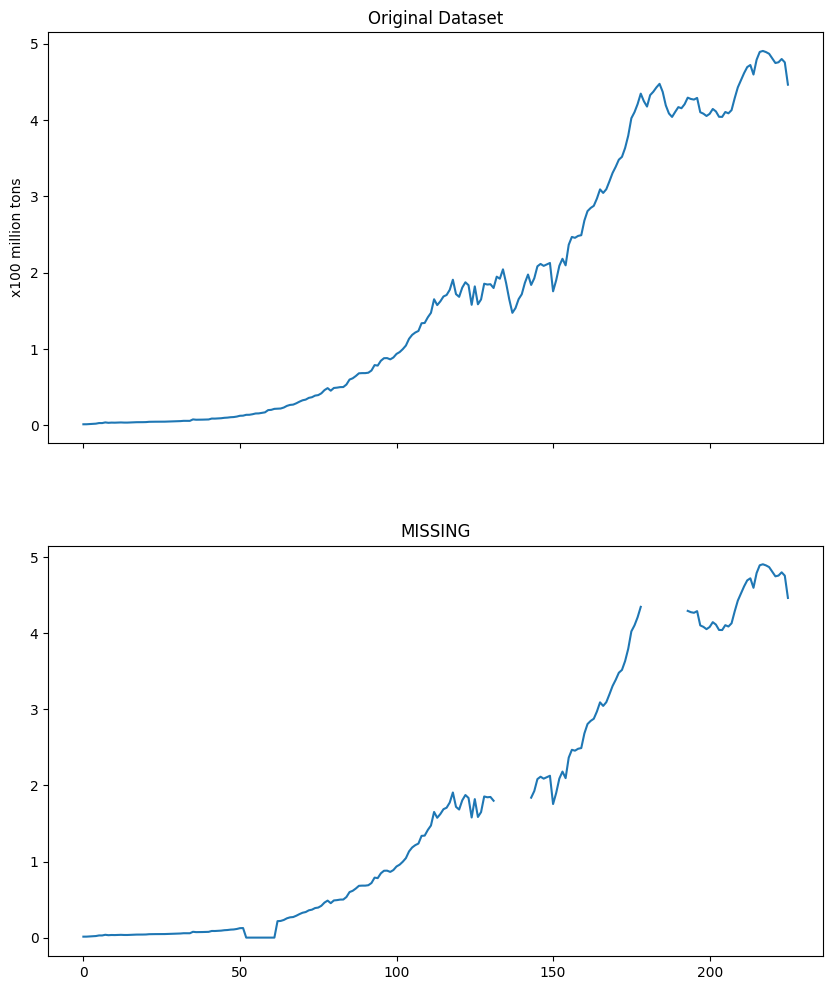

In [15]:
plot_dfs(co2_original,co2_missing,'co2',
         title="Annual cO2 Emission per Capita",
         xlabel = "Years",
         ylabel = "x100 million tons")

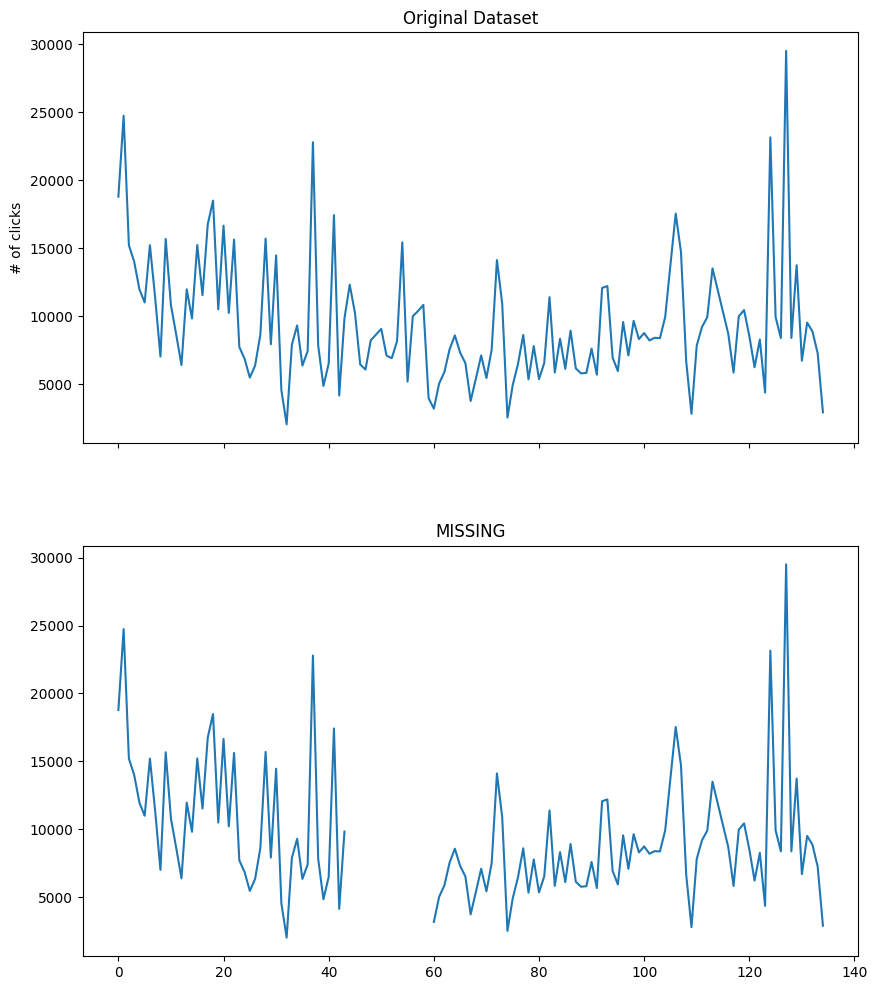

In [16]:
plot_dfs(clicks_original,clicks_missing,
         'clicks',
         title="Page Clicks per Day",
         xlabel = "date",
         ylabel="# of clicks")

In [17]:
#fwill = forward fill : uses the last value before the missing spot and fills the gap forward
#bfill = backward fill : uses the next observation, after the missing spot and fill the gap backward
co2_missing['ffill'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())


In [19]:
co2_missing.head()

,year,co2,ffill,bfill,mean
0,1750,0.0125,0.0125,0.0125,0.0125
1,1760,0.0128,0.0128,0.0128,0.0128
2,1770,0.0150,0.0150,0.0150,0.0150
3,1780,0.0169,0.0169,0.0169,0.0169
4,1790,0.0206,0.0206,0.0206,0.0206


In [20]:
_ = rmse_score(co2_original,co2_missing,'co2')

RMSE for ffill : 0.06789677289762384
RMSE for bfill : 0.06489337203839292
RMSE for mean : 0.6642188275341351


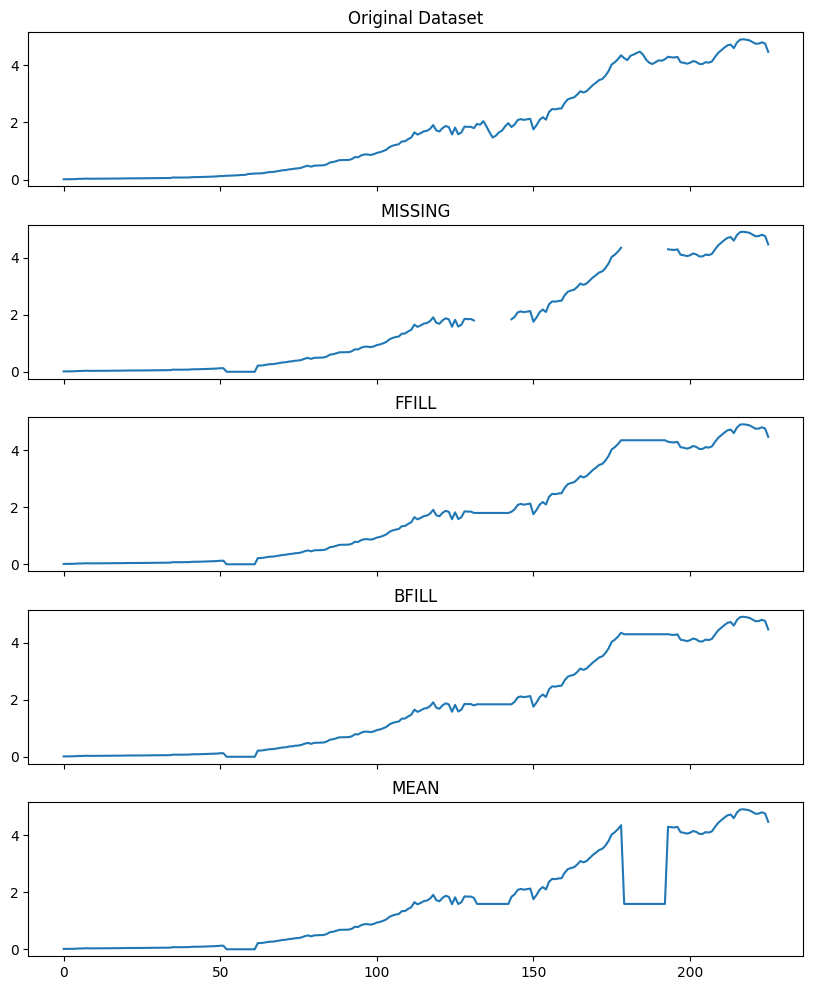

In [21]:
plot_dfs(co2_original,co2_missing,'co2')

In [23]:
#fwill = forward fill
#bfill = backward fill
clicks_missing['ffill'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())


In [24]:
_ = rmse_score(clicks_original,clicks_missing,'clicks')

RMSE for ffill : 1034.1210689204554
RMSE for bfill : 2116.6840489225033
RMSE for mean : 997.7600138929953


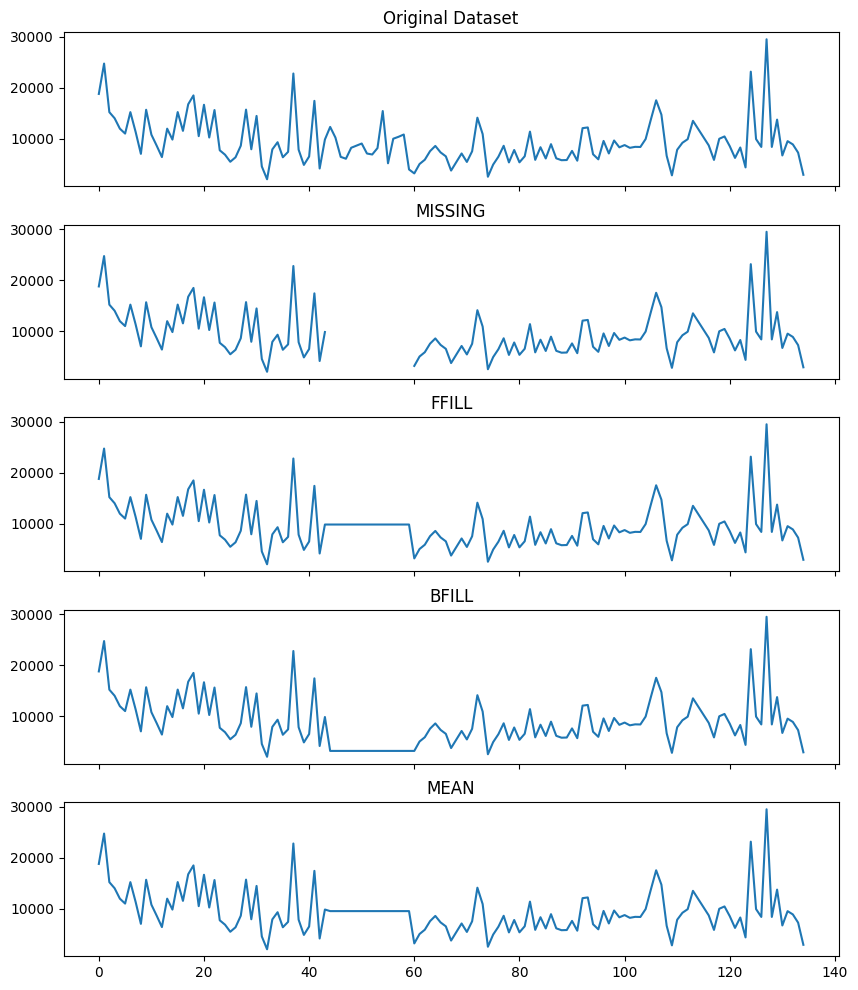

In [25]:
plot_dfs(clicks_original,clicks_missing,'clicks')

#Handling missing data with univariate imputation using scikit-learn

In [52]:
from sklearn.impute import SimpleImputer

In [26]:
co2_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_original.csv'
co2_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_missing.csv'
clicks_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_original.csv'
clicks_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_missing.csv'

In [47]:
co2_original = pd.read_csv(co2_original_path).set_index('year')
co2_missing = pd.read_csv(co2_missing_path).set_index('year')
clicks_original = pd.read_csv(clicks_original_path).set_index('date')
clicks_missing = pd.read_csv(clicks_missing_path).set_index('date')

In [49]:
strategy = [
    ('Mean Strategy','mean'),
    ('Median Strategy','median'),
    ("Most Freuent Strategy","most_frequent")
]

In [50]:
co2_vals = co2_missing['co2'].values.reshape(-1,1)

In [51]:
clicks_vals = clicks_missing['clicks'].values.reshape(-1,1)

In [53]:
for s_name,s in strategy:
  co2_missing[s_name] = (SimpleImputer(strategy=s).fit_transform(co2_vals)
  )
  clicks_missing[s_name] = (
      SimpleImputer(strategy=s).fit_transform(clicks_vals)
  )

In [54]:
_ = rmse_score(co2_original,co2_missing,'co2')

RMSE for Mean Strategy : 0.6642188275341351
RMSE for Median Strategy : 0.8463375334528024
RMSE for Most Freuent Strategy : 1.1285178854727376


In [55]:
_ = rmse_score(clicks_original,clicks_missing,'clicks')

RMSE for Mean Strategy : 997.7600138929953
RMSE for Median Strategy : 959.3580492530756
RMSE for Most Freuent Strategy : 1097.6425985146868


#Handling missing data with multivariate imputation

In [128]:
co2_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_original.csv'
co2_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_missing.csv'
clicks_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_original.csv'
clicks_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_missing.csv'

In [129]:
co2_original = pd.read_csv(co2_original_path).set_index('year')
co2_missing = pd.read_csv(co2_missing_path).set_index('year')
clicks_original = pd.read_csv(clicks_original_path).set_index('date')
clicks_missing = pd.read_csv(clicks_missing_path).set_index('date')

In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor,BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [130]:
estimators = [
    ('extra_trees',ExtraTreesRegressor(n_estimators=10)),
    ('bagging',BaggingRegressor(n_estimators=10)),
    ('elastic_net',ElasticNet()),
    ('linear_regression',LinearRegression()),
    ('knn',KNeighborsRegressor(n_neighbors=3))
]

In [131]:
clicks_vals = clicks_missing.iloc[:,0:3].values

In [132]:
for e_name, e in estimators:
  est = IterativeImputer(
      random_state=15,
      estimator=e).fit(clicks_vals)

  clicks_missing[e_name] = est.transform(clicks_vals)[:,2]

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [133]:
_ = rmse_score(clicks_original,clicks_missing,'clicks')

1683.4415712176362
RMSE for extra_trees : 1683.4415712176362
1182.6037805528013
RMSE for bagging : 1182.6037805528013
945.40752093431
RMSE for elastic_net : 945.40752093431
938.9419831427184
RMSE for linear_regression : 938.9419831427184
1336.8798392251822
RMSE for knn : 1336.8798392251822


In [ ]:
plot_dfs(clicks_original,clicks_missing,'clicks')

#Handling missing data with interpolation

In [190]:
co2_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_original.csv'
co2_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/co2_missing.csv'
clicks_original_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_original.csv'
clicks_missing_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/clicks_missing.csv'

co2_original = pd.read_csv(co2_original_path).set_index('year')
co2_missing = pd.read_csv(co2_missing_path).set_index('year')
clicks_original = pd.read_csv(clicks_original_path).set_index('date')
clicks_missing = pd.read_csv(clicks_missing_path).set_index('date')

In [191]:
interpolations = ['linear','quadratic','nearest','cubic']

In [197]:
clicks_original.index = pd.to_datetime(clicks_original.index)

In [ ]:
clicks_missing.head()

In [196]:
clicks_missing.index = pd.to_datetime(clicks_missing.index)

In [198]:
for intp in interpolations:
  co2_missing[intp] = co2_missing['co2'].interpolate(method=intp)
  clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp)

In [199]:
#there are two additional methods that it would be interesting to test:
#spline and polynomial.
#to use these methods, we will need to provide an integer value for the order parameter
co2_missing['spline'] = co2_missing['co2'].interpolate(method='spline',order=2)
clicks_missing['spline'] = clicks_missing['clicks'].interpolate(method='spline',order=2)

co2_missing['polynomial'] = co2_missing['co2'].interpolate(method='spline',order=5)
clicks_missing['polynomial'] = clicks_missing['clicks'].interpolate(method='spline',order=5)


In [200]:
clicks_missing.head()

,price,location,clicks,linear,quadratic,nearest,cubic,spline,polynomial
date,,,,,,,,,
2008-04-01,43.155647,2,18784.0,18784.0,18784.0,18784.0,18784.0,18784.0,18784.0
2008-04-02,43.079056,1,24738.0,24738.0,24738.0,24738.0,24738.0,24738.0,24738.0
2008-04-03,43.842609,2,15209.0,15209.0,15209.0,15209.0,15209.0,15209.0,15209.0
2008-04-04,43.312376,1,14018.0,14018.0,14018.0,14018.0,14018.0,14018.0,14018.0
2008-04-05,43.941176,1,11974.0,11974.0,11974.0,11974.0,11974.0,11974.0,11974.0


In [201]:
co2_missing.head()

,co2,linear,quadratic,nearest,cubic,spline,polynomial
year,,,,,,,
1750,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1760,0.0128,0.0128,0.0128,0.0128,0.0128,0.0128,0.0128
1770,0.0150,0.0150,0.0150,0.0150,0.0150,0.0150,0.0150
1780,0.0169,0.0169,0.0169,0.0169,0.0169,0.0169,0.0169
1790,0.0206,0.0206,0.0206,0.0206,0.0206,0.0206,0.0206


In [202]:
_ = rmse_score(co2_original,co2_missing,'co2')

0.0655664934619563
RMSE for linear : 0.0655664934619563
0.09103266984784783
RMSE for quadratic : 0.09103266984784783
0.06429449494043808
RMSE for nearest : 0.06429449494043808
0.09110245375484353
RMSE for cubic : 0.09110245375484353
0.1884308637263667
RMSE for spline : 0.1884308637263667
0.15706388647915726
RMSE for polynomial : 0.15706388647915726


In [203]:
_ = rmse_score(clicks_original,clicks_missing,'clicks')

1329.1448378562811
RMSE for linear : 1329.1448378562811
5224.641260626974
RMSE for quadratic : 5224.641260626974
1706.1853705030173
RMSE for nearest : 1706.1853705030173
6199.304875782833
RMSE for cubic : 6199.304875782833
5222.922993448641
RMSE for spline : 5222.922993448641
56743.0688144727
RMSE for polynomial : 56743.0688144727


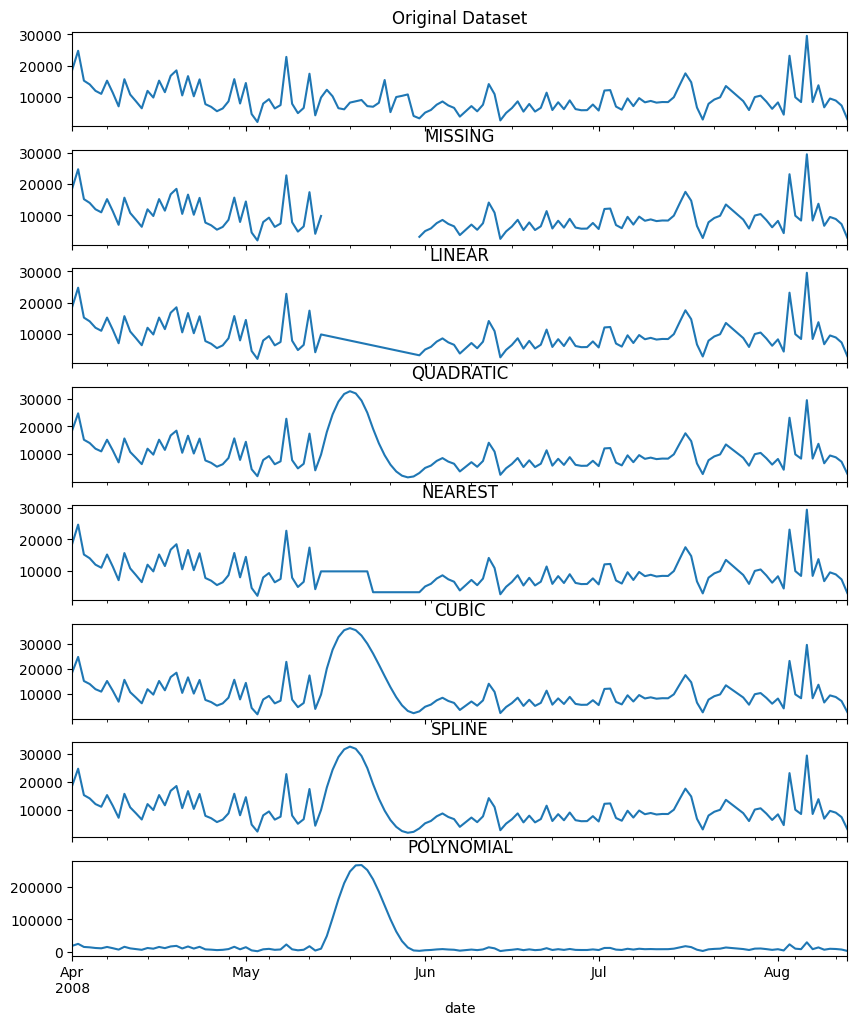

In [204]:
plot_dfs(clicks_original,clicks_missing,'clicks')